In [1]:
#기본 패키지
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
#전처리, 모델링 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
 
#모델 평가 패키지
from sklearn.metrics import classification_report
from sklearn import metrics

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
    
red_wine_quality = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
red_wine_quality.head(5)

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
print(f"the red_wine_quality shape is: {red_wine_quality.shape}")
print("")
print(red_wine_quality.head())
print("")
print(red_wine_quality.columns)

the red_wine_quality shape is: (1599, 12)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  

In [3]:
x = red_wine_quality["pH"].values
y = red_wine_quality["quality"].values

print("The x variable is:", x)
print("")
print("The y variable is:", y)
print("")
print("The shape of x is:", x.shape)
print("The shape of y is:", y.shape)

The x variable is: [3.51 3.2  3.26 ... 3.42 3.57 3.39]

The y variable is: [5 5 5 ... 6 5 6]

The shape of x is: (1599,)
The shape of y is: (1599,)


In [4]:
print(type(x))
x = x.reshape(-1, 1)
print(x)
print("")
print("the shape of x is:", x.shape)

<class 'numpy.ndarray'>
[[3.51]
 [3.2 ]
 [3.26]
 ...
 [3.42]
 [3.57]
 [3.39]]

the shape of x is: (1599, 1)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print("")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print("")

x_train shape (1119, 1)
y_train shape (1119,)

x_test shape (480, 1)
y_test shape (480,)



In [6]:
print(len(train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)))

4


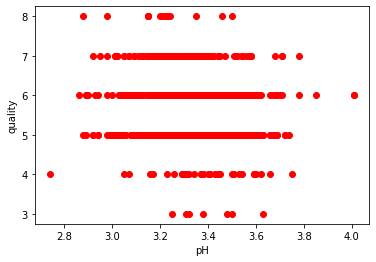

In [7]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel("pH")
plt.ylabel("quality")
plt.show()

In [8]:
# Linear Regression의 클래스 인스턴스 생성
lm = LinearRegression()

# lm.fit()를 호출하고 학습 데이터 전달
# 이러면 트레이닝 포인트에 대한 가장 적합한 라인이 생성
lm.fit(x_train, y_train)


# 주어진 pH에 따라 품질을 예측하는 라인이 존재함
# .predict()를 호출하여 가장 적합한 라인을 테스트
# y_predict로 선형 회귀에 대한 예측을 나타냄
# lm.score() -> 결정 계수(R^2)를 반환함. 관찰된 결과가 모델에 의해 얼마나 잘 복제되는지, 모델 결과를 총 변동 비율로 측정함
y_predict = lm.predict(x_test)

print(f"Train 정확도 {lm.score(x_train, y_train)}")
print(f"Test 정확도 {lm.score(x_test, y_test)}")

Train 정확도 0.0033538148868147433
Test 정확도 0.0029189144565353597


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

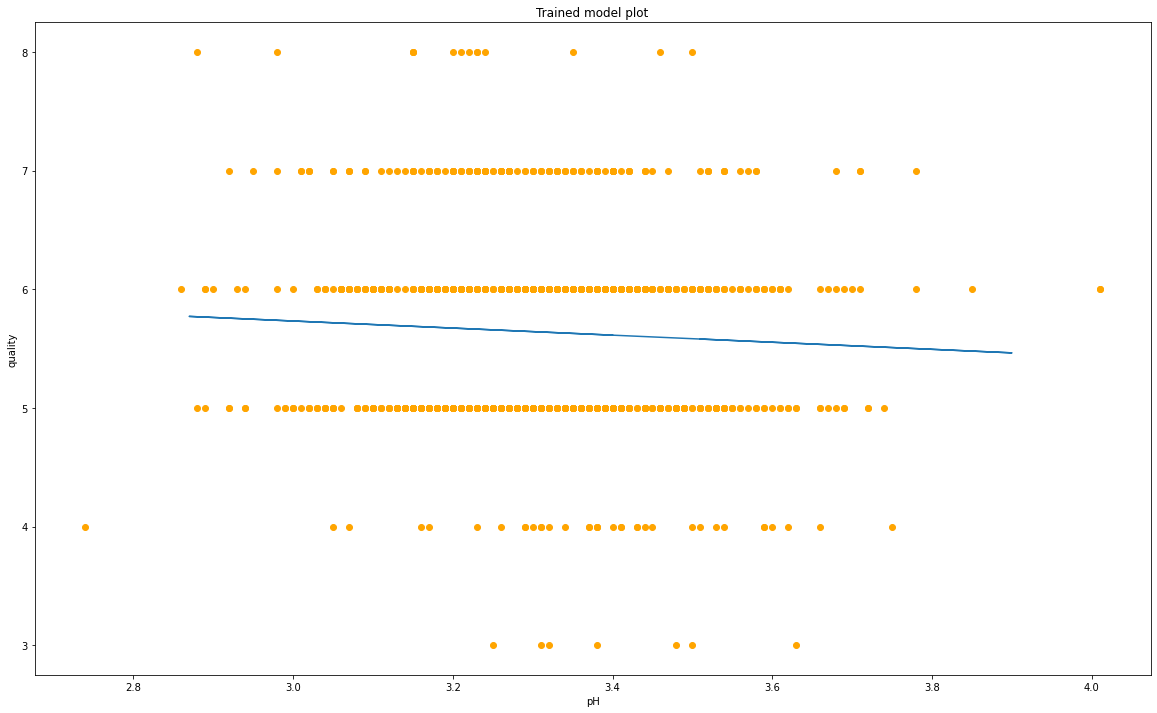

In [9]:
plt.rcParams["figure.figsize"]=[20,12]
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_test,y_predict)
plt.xlabel("pH")
plt.ylabel("quality")
plt.title("Trained model plot")
plt.plot

선형회귀에 의하면, 5에서 7 사이의 품질을 가진 대부분의 와인은 3에서 3.6 사이의 ph 범위를 갖는다는 결론 도출


In [10]:
import pandas as pd

red_wine = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
display(red_wine.head(5))
red_wine.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Quality로 분류 예측하는 것이 목표.
퀄리티의 기준은 7로 분류.

In [11]:
def binary_quality(x):
    target = None
    if x >= 7:
        target = 1
    else:
        target = 0
    return target

red_wine['target'] = red_wine['quality'].apply(lambda x : binary_quality(x))
print(red_wine['target'].value_counts())

0    1382
1     217
Name: target, dtype: int64


7 이상인 와인이 217, 미만인 와인이 1382인 모습

In [12]:
wine_y = red_wine['target']
#필요없는 데이터 값들 제거, y의 label의 형태 파악
wine_x = red_wine.drop(['target', 'quality'], axis = 1)
display(wine_x.head())
display(wine_y.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

#test set을 20%, trainnig set을 80%로 설정
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y,
                                                    test_size = 0.2,
                                                    stratify=wine_y,
                                                    random_state = 12)

In [14]:
#데이터 전처리
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(x_train)

[[0.22123894 0.40410959 0.         ... 0.53043478 0.13333333 0.15384615]
 [0.25663717 0.19863014 0.18987342 ... 0.24347826 0.15151515 0.10769231]
 [0.2300885  0.15068493 0.26582278 ... 0.44347826 0.12727273 0.26153846]
 ...
 [0.20353982 0.49315068 0.26582278 ... 0.5826087  0.23636364 0.12820513]
 [0.25663717 0.32191781 0.27848101 ... 0.20869565 0.05454545 0.12307692]
 [0.92035398 0.06164384 0.55696203 ... 0.1826087  0.30909091 0.12307692]]


In [15]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

rfc = RandomForestClassifier(random_state=12)
xgb = XGBClassifier(random_state=12)
lrg = LogisticRegression(solver='liblinear', random_state=12)

rfc_cv_scores = cross_val_score(rfc, x_train , y_train , cv=5)
xgb_cv_scores = cross_val_score(xgb, x_train , y_train , cv=5)
lrg_cv_scores = cross_val_score(lrg, x_train , y_train , cv=5)

print("random forest 평균 정확도: ", round(np.mean(rfc_cv_scores), 4))
print("XGBoost 평균 정확도: ", round(np.mean(xgb_cv_scores), 4))
print("LogisticRegression 평균 정확도: ", round(np.mean(lrg_cv_scores), 4))

random forest 평균 정확도:  0.9007
XGBoost 평균 정확도:  0.8976
LogisticRegression 평균 정확도:  0.8718


In [16]:
from sklearn.metrics import accuracy_score

rfc.fit(x_train , y_train)
lrg.fit(x_train, y_train)
pred = rfc.predict(x_test)
pred2 = lrg.predict(x_test)
accuracy = accuracy_score(y_test, pred)
accuracy2 = accuracy_score(y_test, pred2)

print(" test 데이터에서의 RandomForestClassifier 정확도:", round(accuracy,4))
print(" test 데이터에서의 LogisticRegression 정확도:", round(accuracy2,4))

 test 데이터에서의 RandomForestClassifier 정확도: 0.9094
 test 데이터에서의 LogisticRegression 정확도: 0.8844


In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(11,)),
    tf.keras.layers.Dense(units= 40, activation = 'relu'),
    tf.keras.layers.Dense(units = 20, activation='relu'),
    tf.keras.layers.Dense(units = 20, activation='relu'),
    tf.keras.layers.Dense(units= 1,  activation='sigmoid'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 1,741
Trainable params: 1,741
Non-trainable params: 0
_________________________________________________________________


2023-01-15 16:16:52.238247: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


품질에 따라 1과 0으로 분류하는 단순이진분류가 목적이므로, 손실함수로 binary_crossEntropy를 사용하는 것이 유리함.
binary_crossEntropy는 결과값을 sigmoid의 형태로 출력하므로 가장 마지막 계층에는 sigmoid를 사용해야 함.

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 100, batch_size = 512)
model.evaluate(x_test, y_test, verbose=2)

2023-01-15 16:16:52.499368: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
3/3 [==============================] - 1s 6ms/step - loss: 0.7108 - accuracy: 0.4574
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6319 - accuracy: 0.8640
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5527 - accuracy: 0.8640
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.8640
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4127 - accuracy: 0.8640
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4293 - accuracy: 0.8640
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4257 - accuracy: 0.8640
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4012 - accuracy: 0.8640
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.8640
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.3882 - accuracy: 0.8640
Epoch 11/100
3/3 [===========

[0.26796871423721313, 0.90625]

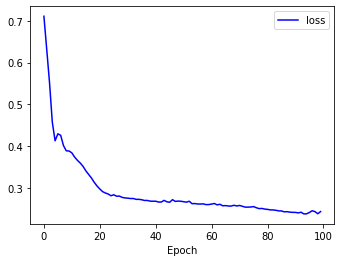

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

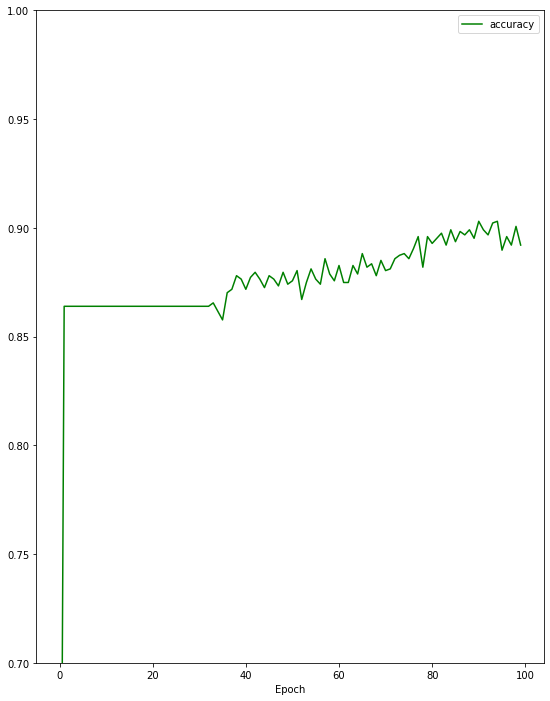

In [21]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()